Inspired by comment from https://www.quantamagazine.org/20160313-mathematicians-discover-prime-conspiracy/

"Soundararajan was drawn to study consecutive primes after hearing a lecture at Stanford by the mathematician Tadashi Tokieda, of the University of Cambridge, in which he mentioned a counterintuitive property of coin-tossing: If Alice tosses a coin until she sees a head followed by a tail, and Bob tosses a coin until he sees two heads in a row, then on average, Alice will require four tosses while Bob will require six tosses (try this at home!), even though head-tail and head-head have an equal chance of appearing after two coin tosses."

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import random

In [2]:
def flip():
    "flip a coin and return 'H'eads or 'T'ails"
    if random() >= 0.5:
        return "H"
    return "T"

def flips(n):
    "flip a coin n times. return a string describing the sequence"
    return ''.join([flip() for i in range(n)])

def find_in_flips(seq,n):
    "how many flips did it take to find a particular sequence"
    cur_flips = flips(n)
    try:
        x = cur_flips.index(seq)
        return x + len(seq)
    except ValueError:
        return n + len(seq)

def run_game(seq,num_tries,max_flips):
    game_results = np.zeros(num_tries)
    for i in range(num_tries):
        game_results[i] = find_in_flips(seq,max_flips)
    return game_results

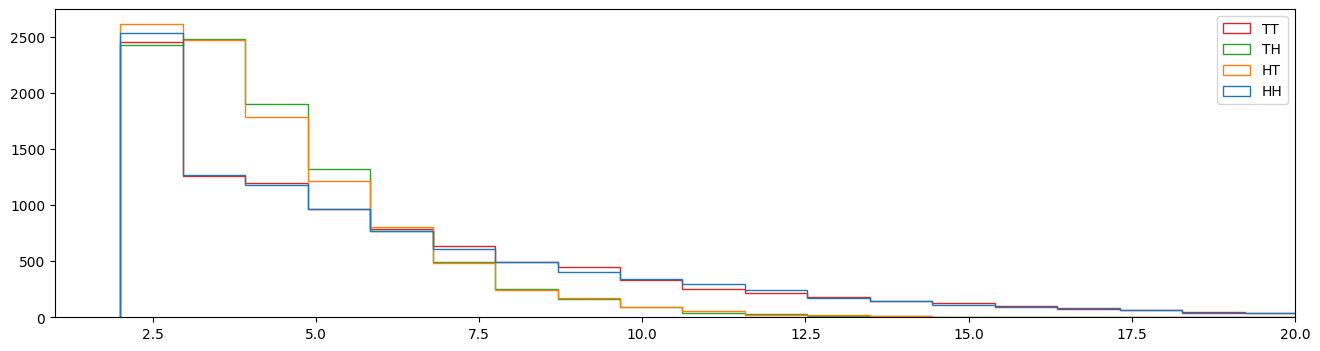

In [9]:
num_games=10000
games = [run_game(x+y,num_games,50) for x in ['H','T'] for y in ['H','T']]
labels = [x+y for x in ['H','T'] for y in ['H','T']]
plt.figure(figsize=[16,4])
values,bases,patches = plt.hist(games,bins=int(np.max(games)),label=labels,histtype = 'step')
plt.xlim(1,20)
l = plt.legend()

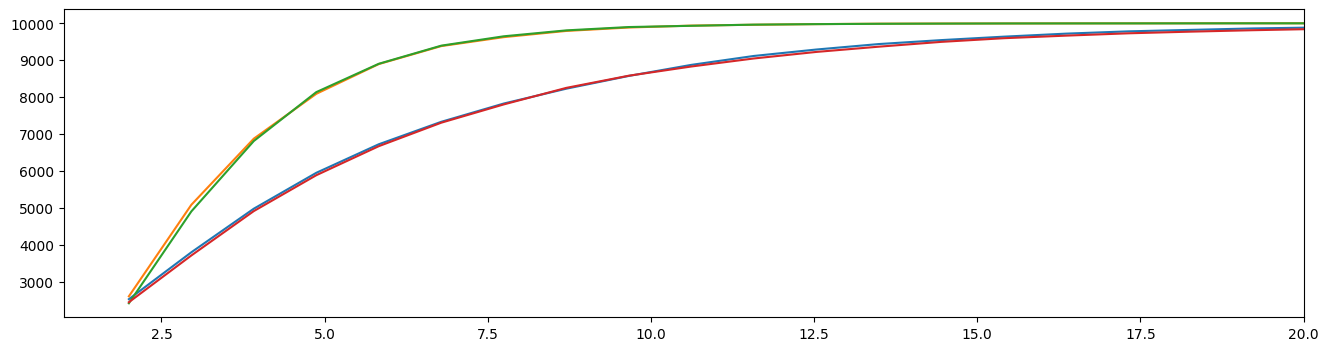

In [10]:
cumulative = np.cumsum(values,axis=1)
cumulative_bases = bases[:-1]
plt.figure(figsize=[16,4])
plt.plot(cumulative_bases, cumulative.T)
x = plt.xlim(1,20)

In [11]:
[g.mean() for g in games]

[5.957, 3.9889, 4.0215, 6.0563]